# Neural Net to indentify Craters
A neural network trained on images from NASA that draws bounding boxes for craters in an image

In [24]:
# Some imports
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

In [2]:
# Directories
root_dir = ".."
data_dir = "data"
NASA_dir = os.path.join(root_dir, data_dir, "NASA")
A15_dir = os.path.join(NASA_dir, "A15")
LRO_dir = os.path.join(NASA_dir, "LRO")
LMS_A15 = os.path.join(A15_dir, "GTF.lms")
LMS_LRO = os.path.join(LRO_dir, "GTF.lms")

In [31]:
def read_lms(file_path):
    '''
    Function to parse .lms file and extract data into a meaningful format
    '''
    f = open(file_path, "r")
    labels = {}
    
    for line in f:
        split = line.split(" : ")[:-1]
        values = []
        for i in range(2, len(split), 4):
            box = (int(split[i]), int(split[i + 1]), int(split[i + 2]), int(split[i + 3]))
            values.append(box)
        labels[split[0]] = values
        
    return labels

# Get labels for LRO images
lro_labels = read_lms(LMS_LRO)

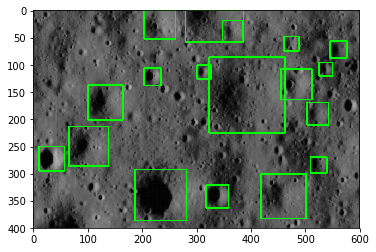

In [36]:
def show_craters(img, craters):
    '''
    Plots the bounding box for craters in the image
    '''
    for crater in craters:
        cv2.rectangle(img, (crater[0], crater[1]), (crater[2], crater[3]), (0, 255, 0), 2)
    plt.imshow(img, cmap='gray')


img_name = "M22091.jpg"
craters = lro_labels[img_name]
img = cv2.imread(os.path.join(LRO_dir, img_name))
show_craters(img, craters)

In [38]:
# Read all LRO images
LRO_files = os.listdir(LRO_dir)
images = {}
for file in LRO_files:
    if file[-3:] == 'jpg':
        images[file] = cv2.imread(os.path.join(LRO_dir, file))

258


In [41]:
# Format data into arrays
# Repeat image for every crater in image i.e., create a "new" training example
X = []
y = []
for image in images:
    for box in lro_labels[image]:
        X.append(images[image])
        y.append(box)

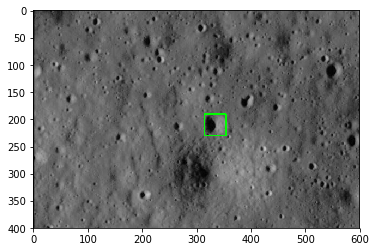

In [47]:
# Make sure we encoded the data properly
# Try changing rand a few times and make sure the bounding box actually finds a crater
rand = 25
temp_img = X[rand]
cv2.rectangle(temp_img, (y[rand][0], y[rand][1]), (y[rand][2], y[rand][3]), (0, 255, 0), 2)
plt.imshow(temp_img, cmap='gray')

We might want to pickle these values. That way, it will be faster to retrieve them. Right now it makes no difference because the dataset we are dealing with is small.

In [48]:
print(len(X))

1433
